# Домашнее задание 1
Матясов ПМ1

Задача: по привычкам и другим данным предсказать оценку студента.

In [196]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Загружаем данные

In [303]:
df = pd.read_csv('archive_3/StudentPerformanceFactors.csv')

In [304]:
df

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                            No            7               73   
1                            No            8               59   
2                           Yes            7               91   
3                           Yes            8               98   
4                           Yes            6               65   
...                         ...          ...              ...   
6602                         No            7               76   
6603                         No            8               81   
6604                        Yes            6               65   
6605                        Yes            6               91   
6606                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
0                 Low             Yes                  0           Low   
1                 Low             Yes                  2        Medium   
2              Medium             Yes                  2        Medium   
3              Medium             Yes                  1        Medium   
4              Medium             Yes                  3        Medium   
...               ...             ...                ...           ...   
6602           Medium             Yes                  1          High   
6603           Medium             Yes                  3           Low   
6604              Low             Yes                  3           Low   
6605             High             Yes                  2           Low   
6606           Medium             Yes                  0        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
0             Medium      Public       Positive                  3   
1             Medium      Public       Negative                  4   
2             Medium      Public        Neutral                  4   
3             Medium      Public       Negative                  4   
4               High      Public        Neutral                  4   
...              ...         ...            ...                ...   
6602          Medium      Public       Positive                  2   
6603            High      Public       Positive                  2   
6604          Medium      Public       Negative                  2   
6605          Medium     Private       Positive                  3   
6606          Medium      Public       Positive                  4   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
0                       No              High School               Near   
1                       No                  College           Moderate   
2                       No             Postgraduate               Near   
3                       No              High School           Moderate   
4                       No                  College               Near   
...                    ...                      ...                ...   
6602                    No              High School             

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

# Вычисляем основные характеристики

In [306]:
df.describe()

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             8.000000           6.000000   101.000000

In [307]:
numeric_columns = df.select_dtypes(include=[int, float]).columns

In [308]:
object_columns = df.select_dtypes(include=[object]).columns

In [309]:
object_columns

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [310]:
numeric_columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

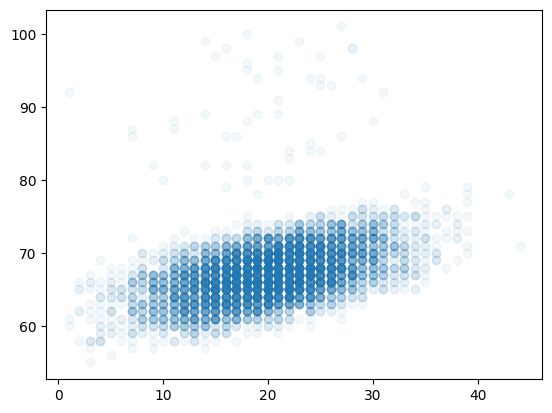

In [311]:
plt.scatter(df['Hours_Studied'], df['Exam_Score'], alpha=0.05)
pass

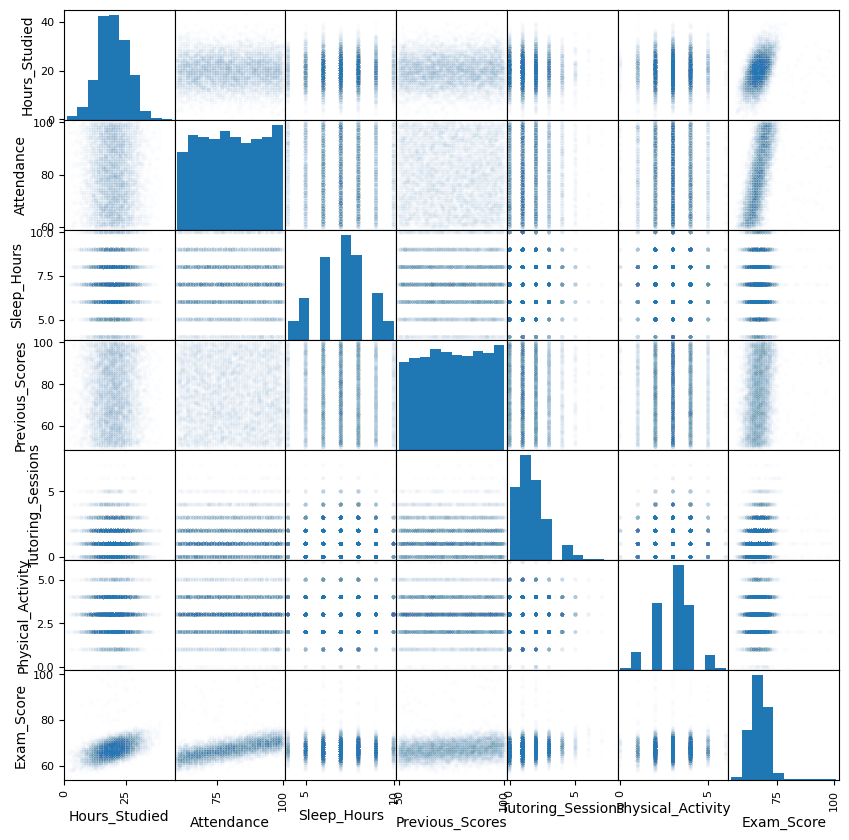

In [312]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha = .01, figsize = (10, 10))
pass

На диаграммах видно, что есть выбросы у exam_score, и у tutoring_session

In [313]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)

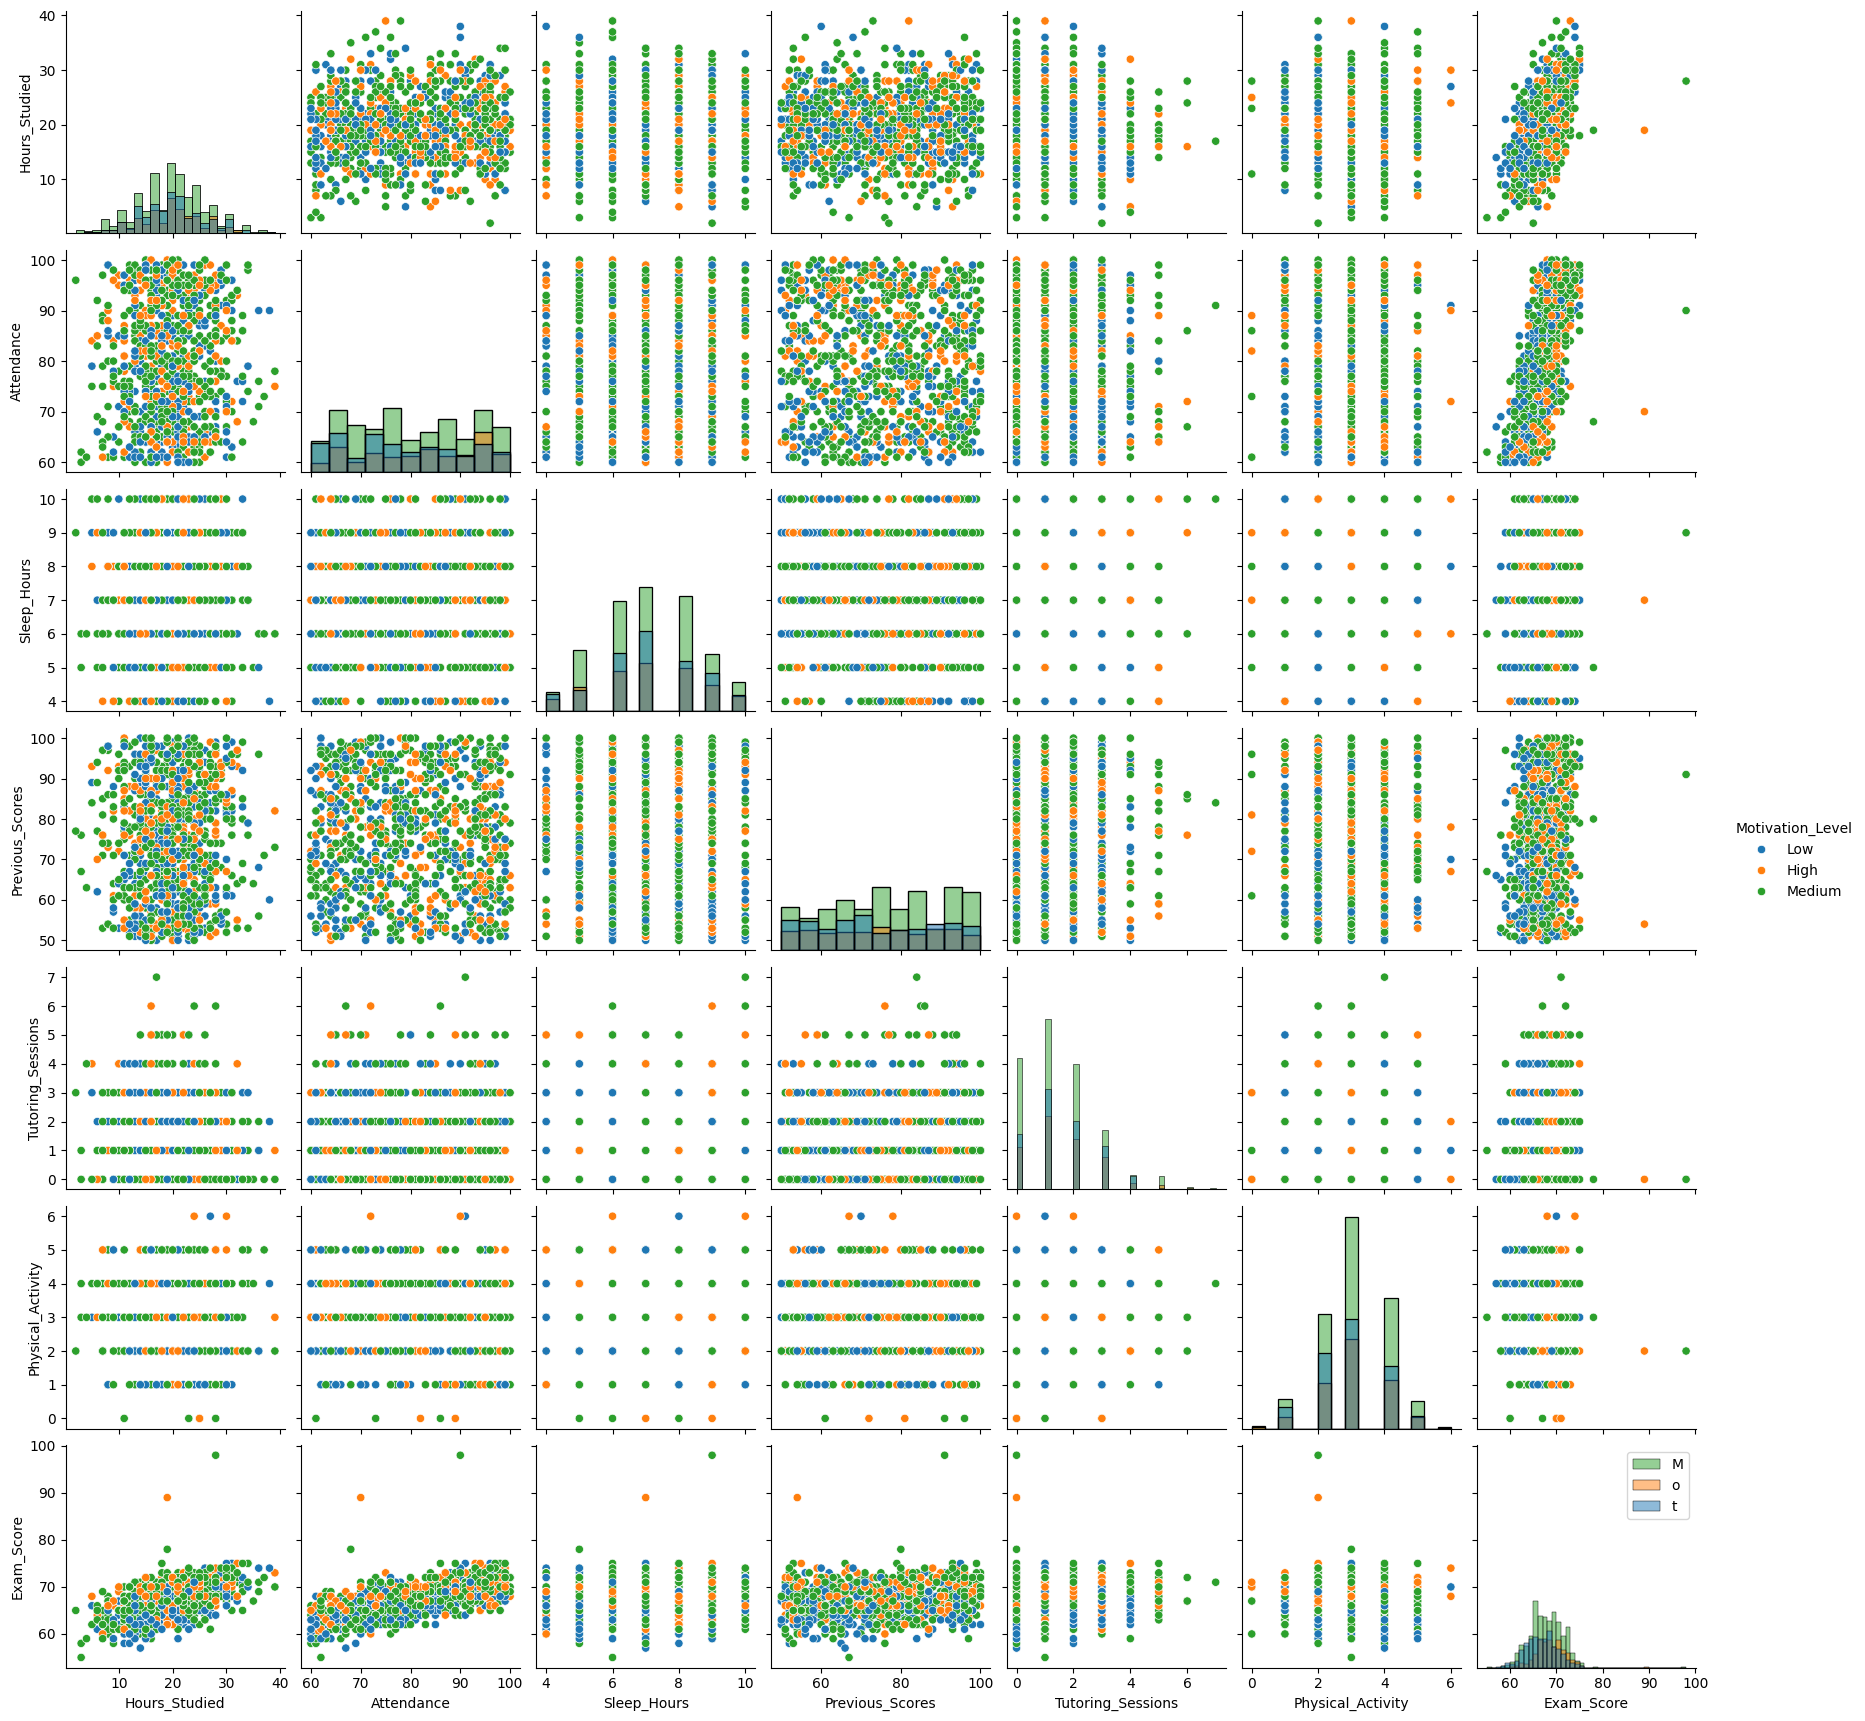

In [314]:
sns.pairplot(df.iloc[random_subset], hue='Motivation_Level', diag_kind='hist')
plt.legend('Motivation level')
pass

In [315]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

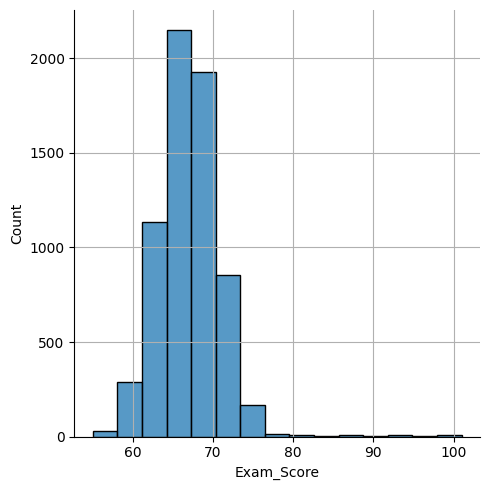

In [316]:
sns.displot(df['Exam_Score'], bins=15)
plt.grid()
pass

In [317]:
df['Exam_Score'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    59.00
0.010    59.00
0.050    62.00
0.100    63.00
0.500    67.00
0.900    72.00
0.950    73.00
0.990    76.00
0.995    85.97
Name: Exam_Score, dtype: float64

In [318]:
numeric_columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

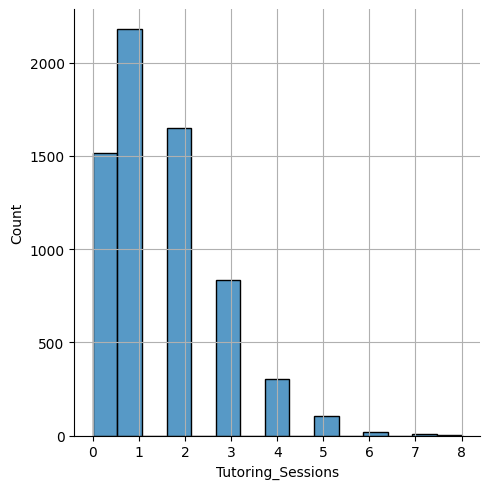

In [319]:
sns.displot(df['Tutoring_Sessions'], bins=15)
plt.grid()
pass

In [320]:
df['Tutoring_Sessions'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.0
0.010    0.0
0.050    0.0
0.100    0.0
0.500    1.0
0.900    3.0
0.950    4.0
0.990    5.0
0.995    5.0
Name: Tutoring_Sessions, dtype: float64

In [321]:
rows_to_drop = df[
    (df['Tutoring_Sessions'] > df['Tutoring_Sessions'].quantile(.995)) | 
    (df['Exam_Score'].quantile(.995)< df['Exam_Score'])].index
df = df.drop(rows_to_drop)
data.shape

(6547, 20)

Убрал выбросы у exam_score, и у tutoring_session

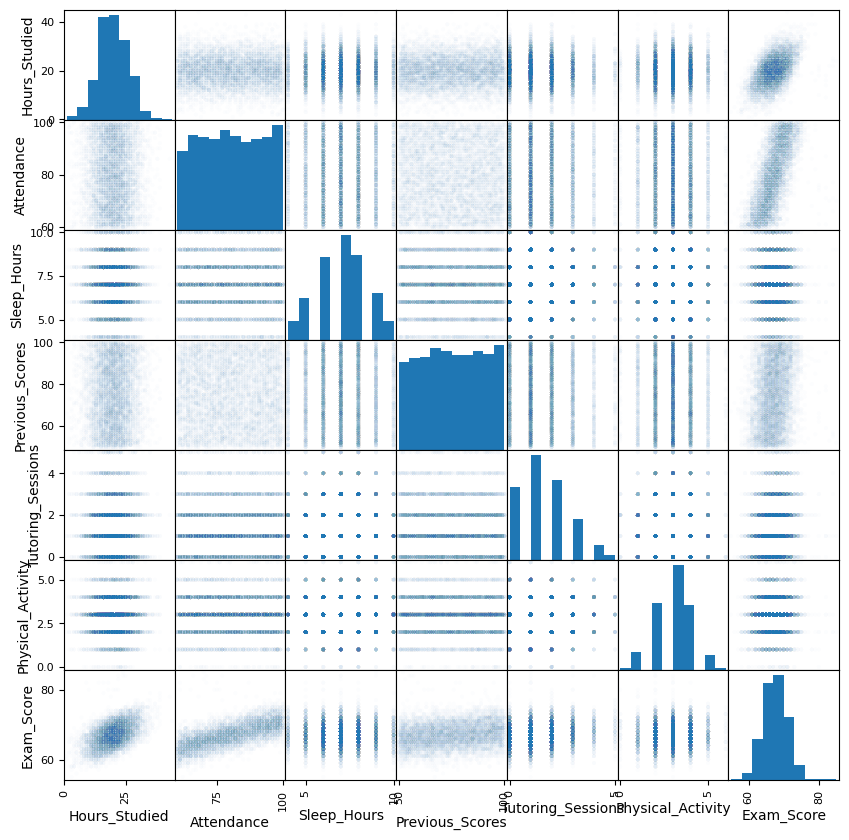

In [322]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha = .01, figsize = (10, 10))
pass

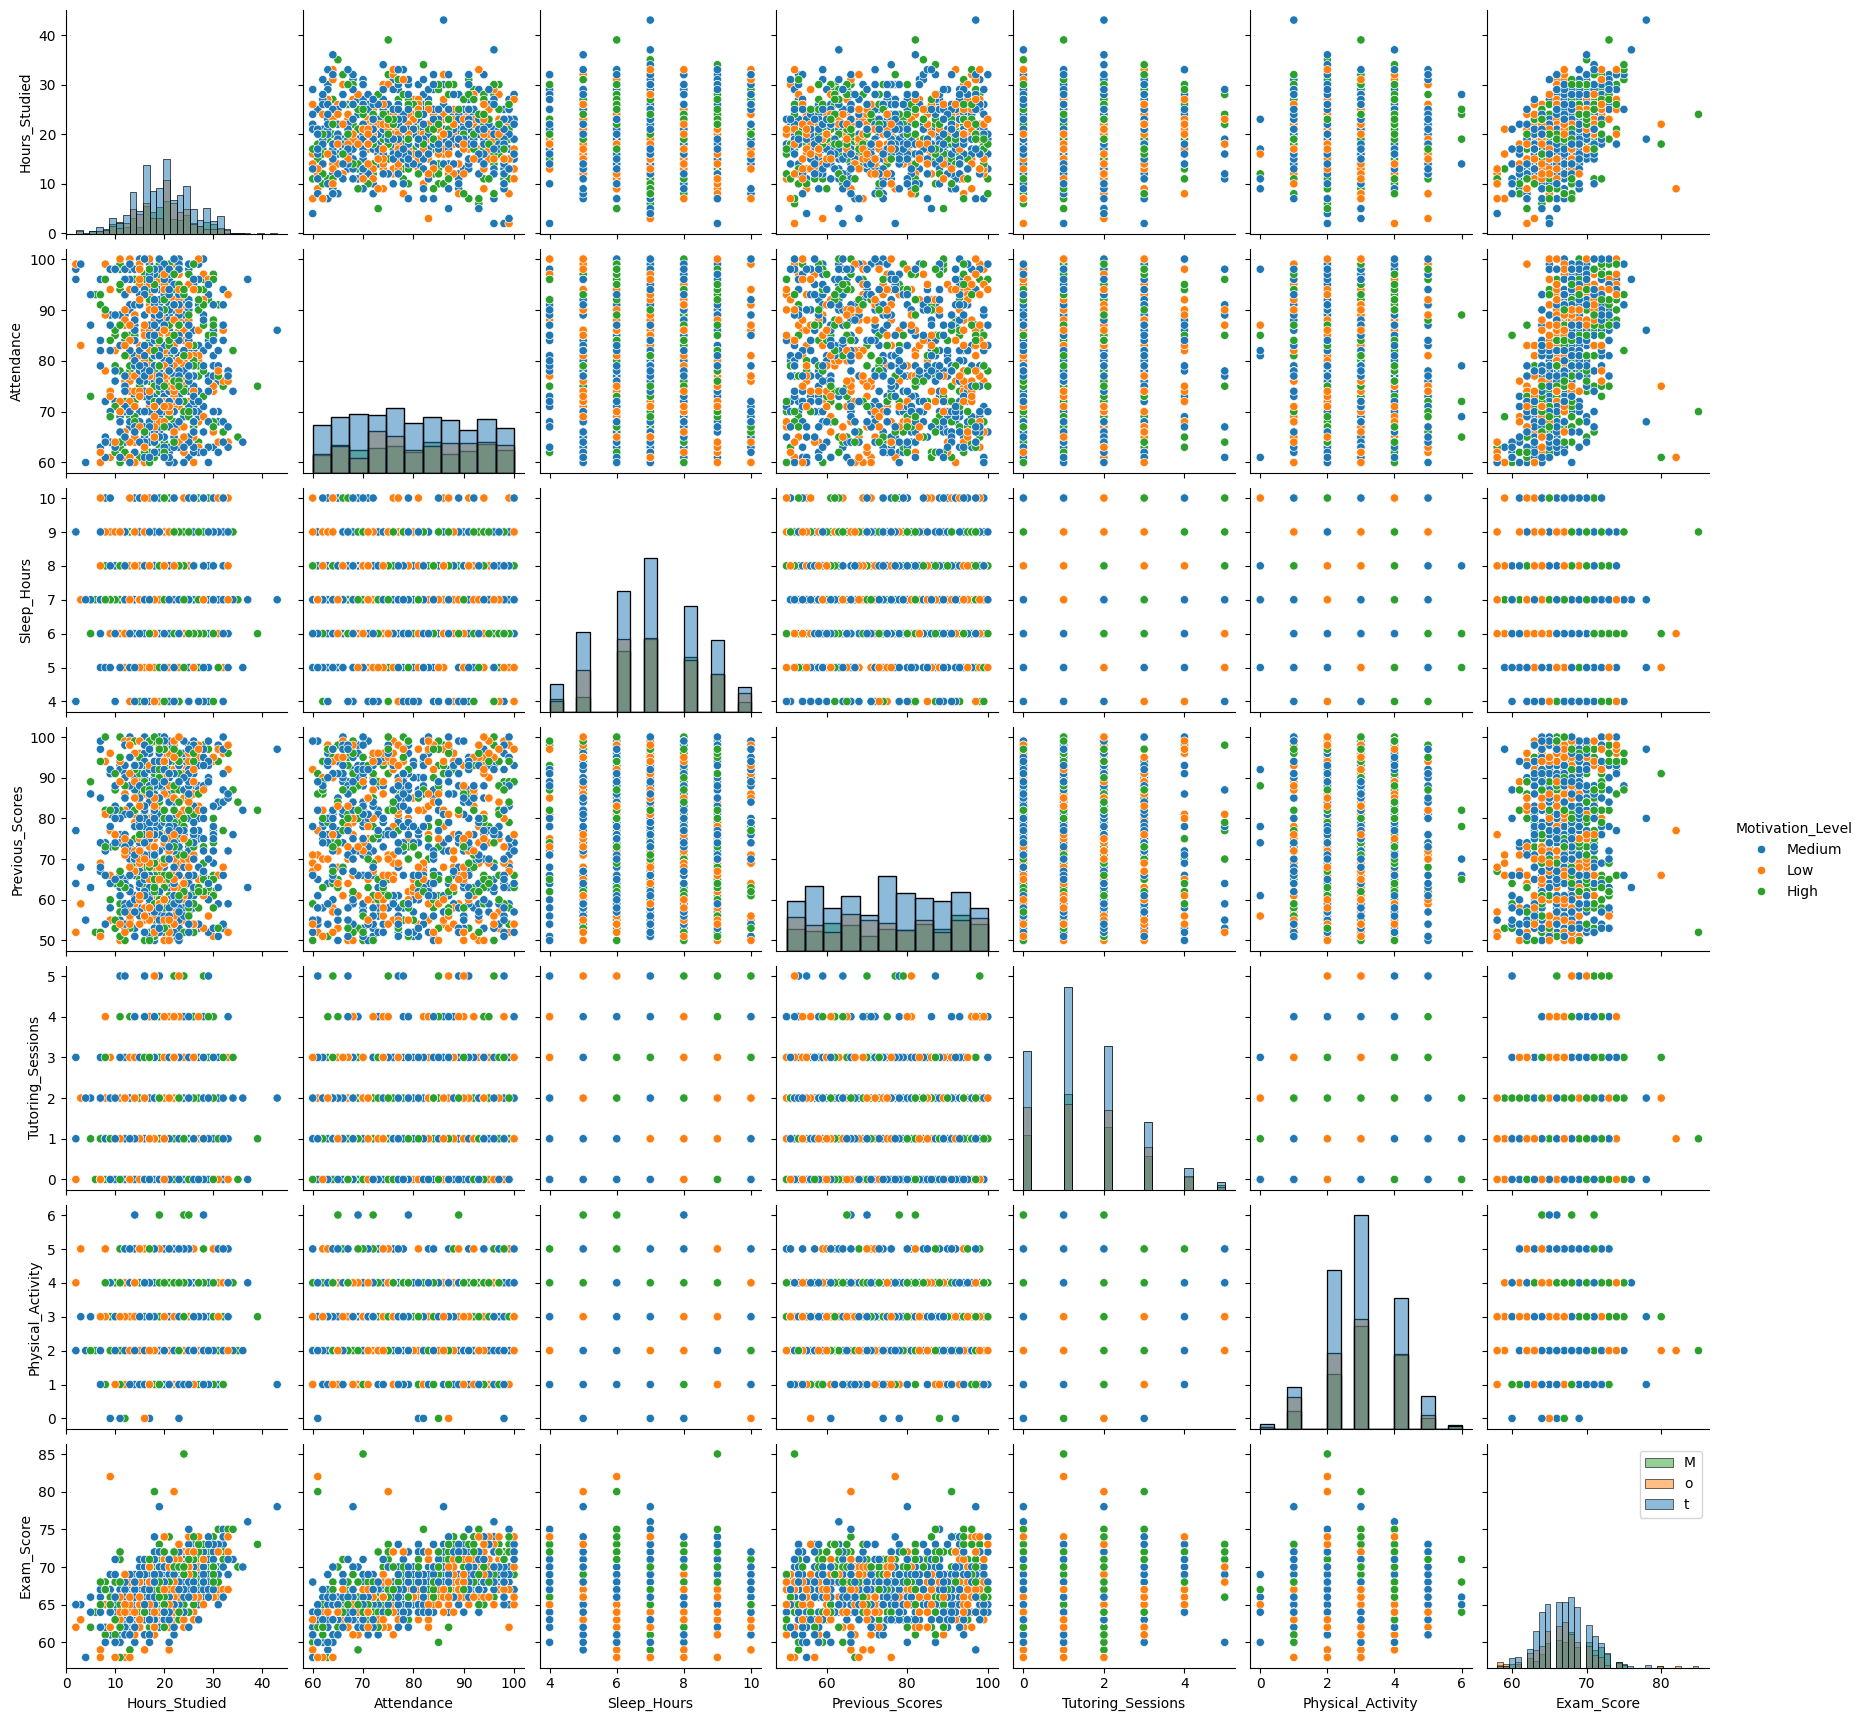

In [323]:
sns.pairplot(df.iloc[random_subset], hue='Motivation_Level', diag_kind='hist')
plt.legend('Motivation level')
pass

Не похоже что уровень мотивации как-то влияет на успеваемость

In [324]:
corr_mat=df[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']].corr()

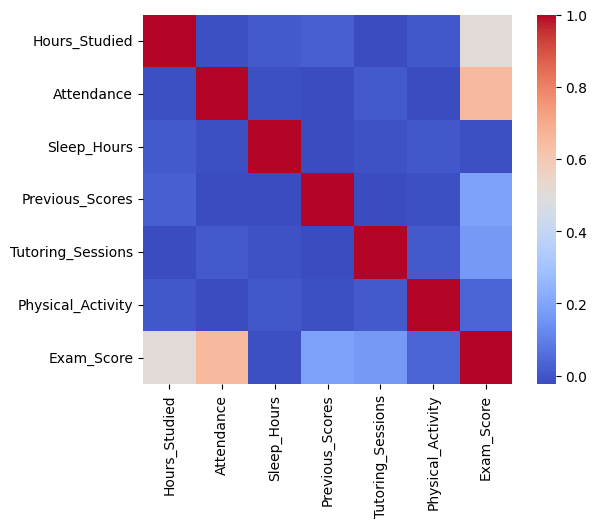

In [325]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Данные линейно связаны только с успеваемостью, но не между собой.

In [326]:
corr_mat > 0.5

Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
Hours_Studied               True       False        False            False   
Attendance                 False        True        False            False   
Sleep_Hours                False       False         True            False   
Previous_Scores            False       False        False             True   
Tutoring_Sessions          False       False        False            False   
Physical_Activity          False       False        False            False   
Exam_Score                  True        True        False            False   

                   Tutoring_Sessions  Physical_Activity  Exam_Score  
Hours_Studied                  False              False        True  
Attendance                     False              False        True  
Sleep_Hours                    False              False       False  
Previous_Scores                False              False       False  
Tutoring_Sessions               True              False       False  
Physical_Activity              False               True       False  
Exam_Score                     False              False        True

In [327]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

Attendance     Exam_Score    0.653442
Hours_Studied  Exam_Score    0.507653
dtype: float64

In [328]:
corr_mat

Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
Hours_Studied           1.000000   -0.014008     0.010317         0.023677   
Attendance             -0.014008    1.000000    -0.015622        -0.022725   
Sleep_Hours             0.010317   -0.015622     1.000000        -0.020357   
Previous_Scores         0.023677   -0.022725    -0.020357         1.000000   
Tutoring_Sessions      -0.020466    0.010245    -0.008090        -0.021207   
Physical_Activity       0.001930   -0.023807     0.000589        -0.012788   
Exam_Score              0.507653    0.653442    -0.012185         0.191214   

                   Tutoring_Sessions  Physical_Activity  Exam_Score  
Hours_Studied              -0.020466           0.001930    0.507653  
Attendance                  0.010245          -0.023807    0.653442  
Sleep_Hours                -0.008090           0.000589   -0.012185  
Previous_Scores            -0.021207          -0.012788    0.191214  
Tutoring_Sessions           1.000000           0.010798    0.165185  
Physical_Activity           0.010798           1.000000    0.032833  
Exam_Score                  0.165185           0.032833    1.000000

In [329]:
df.isna().sum() 

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [330]:
df.isna().sum().sum() / df.size * 100

0.1794715136703834

In [333]:
df.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

In [334]:
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode().iloc[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode().iloc[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode().iloc[0], inplace=True)

/tmp/ipykernel_181712/18927087.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode().iloc[0], inplace=True)
/tmp/ipykernel_181712/18927087.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [335]:
df.isna().sum() 

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [336]:
df.describe()

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6547.000000  6547.000000  6547.000000      6547.000000   
mean       19.967161    79.954788     7.031159        75.035894   
std         5.981997    11.542788     1.467108        14.390300   
min         1.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        87.000000   
max        44.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6547.000000        6547.000000  6547.000000  
mean            1.474416           2.966550    67.087521  
std             1.194144           1.029482     3.408506  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             5.000000           6.000000    85.000000

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6547 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6547 non-null   int64 
 1   Attendance                  6547 non-null   int64 
 2   Parental_Involvement        6547 non-null   object
 3   Access_to_Resources         6547 non-null   object
 4   Extracurricular_Activities  6547 non-null   object
 5   Sleep_Hours                 6547 non-null   int64 
 6   Previous_Scores             6547 non-null   int64 
 7   Motivation_Level            6547 non-null   object
 8   Internet_Access             6547 non-null   object
 9   Tutoring_Sessions           6547 non-null   int64 
 10  Family_Income               6547 non-null   object
 11  Teacher_Quality             6547 non-null   object
 12  School_Type                 6547 non-null   object
 13  Peer_Influence              6547 non-null   object
 1

In [338]:
mapping_Parental_Education_Level = {
    'High School': 1,
    'College': 2,
    'Postgraduate': 3
}

In [ ]:
df['Parental_Education_Level_Numeric'] = df['Parental_Education_Level'].replace(mapping_Parental_Education_Level)

In [ ]:
parental_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
resources_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
activities_mapping = {'No': 0, 'Yes': 1}

df['Parental_Involvement_Numeric'] = df['Parental_Involvement'].replace(parental_mapping)
df['Access_to_Resources_Numeric'] = df['Access_to_Resources'].replace(resources_mapping)
df['Extracurricular_Activities_Numeric'] = df['Extracurricular_Activities'].replace(activities_mapping)

In [ ]:
motivation_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
internet_access_mapping = {'No': 0, 'Yes': 1}
family_income_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
teacher_quality_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
school_type_mapping = {'Public': 0, 'Private': 1}

df['Motivation_Level_Numeric'] = df['Motivation_Level'].replace(motivation_mapping)
df['Internet_Access_Numeric'] = df['Internet_Access'].replace(internet_access_mapping)
df['Family_Income_Numeric'] = df['Family_Income'].replace(family_income_mapping)
df['Teacher_Quality_Numeric'] = df['Teacher_Quality'].replace(teacher_quality_mapping)
df['School_Type_Numeric'] = df['School_Type'].replace(school_type_mapping)


In [ ]:
peer_influence_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
learning_disabilities_mapping = {'No': 0, 'Yes': 1}
parental_education_level_mapping = {'High School': 1, 'College': 2, 'Postgraduate': 3}
distance_from_home_mapping = {'Near': 1, 'Moderate': 2, 'Far': 3}
gender_mapping = {'Male': 0, 'Female': 1}

df['Peer_Influence_Numeric'] = df['Peer_Influence'].replace(peer_influence_mapping)
df['Learning_Disabilities_Numeric'] = df['Learning_Disabilities'].replace(learning_disabilities_mapping)
df['Parental_Education_Level_Numeric'] = df['Parental_Education_Level'].replace(parental_education_level_mapping)
df['Distance_from_Home_Numeric'] = df['Distance_from_Home'].replace(distance_from_home_mapping)
df['Gender_Numeric'] = df['Gender'].replace(gender_mapping)

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6547 entries, 0 to 6606
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Hours_Studied                       6547 non-null   int64 
 1   Attendance                          6547 non-null   int64 
 2   Parental_Involvement                6547 non-null   object
 3   Access_to_Resources                 6547 non-null   object
 4   Extracurricular_Activities          6547 non-null   object
 5   Sleep_Hours                         6547 non-null   int64 
 6   Previous_Scores                     6547 non-null   int64 
 7   Motivation_Level                    6547 non-null   object
 8   Internet_Access                     6547 non-null   object
 9   Tutoring_Sessions                   6547 non-null   int64 
 10  Family_Income                       6547 non-null   object
 11  Teacher_Quality                     6547 non-null   object
 1

In [345]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score', 'Parental_Education_Level_Numeric',
       'Parental_Involvement_Numeric', 'Access_to_Resources_Numeric',
       'Extracurricular_Activities_Numeric', 'Motivation_Level_Numeric',
       'Internet_Access_Numeric', 'Family_Income_Numeric',
       'Teacher_Quality_Numeric', 'School_Type_Numeric',
       'Peer_Influence_Numeric', 'Learning_Disabilities_Numeric',
       'Distance_from_Home_Numeric', 'Gender_Numeric'],
      dtype='object')

In [346]:
numeric_columns = df.select_dtypes(include=[int, float]).columns

In [347]:
numeric_columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score',
       'Parental_Education_Level_Numeric', 'Parental_Involvement_Numeric',
       'Access_to_Resources_Numeric', 'Extracurricular_Activities_Numeric',
       'Motivation_Level_Numeric', 'Internet_Access_Numeric',
       'Family_Income_Numeric', 'Teacher_Quality_Numeric',
       'School_Type_Numeric', 'Peer_Influence_Numeric',
       'Learning_Disabilities_Numeric', 'Distance_from_Home_Numeric',
       'Gender_Numeric'],
      dtype='object')

In [348]:
data = df[numeric_columns]

In [349]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

In [350]:
data_stand.head()

Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
0       0.506994    0.350454    -0.021239        -0.141477          -1.234705   
1      -0.161679   -1.382230     0.660375        -1.114354           0.440135   
2       0.674163    1.563332    -0.021239         1.109366           0.440135   
3       1.510004    0.783624     0.660375         1.595804          -0.397285   
4      -0.161679    1.043527    -0.702852        -0.697407           1.277555   

   Physical_Activity  Exam_Score  Parental_Education_Level_Numeric  \
0           0.032492   -0.025677                         -0.894913   
1           1.003854   -1.785979                          0.388266   
2           1.003854    2.028009                          1.671446   
3           1.003854    1.147858                         -0.894913   
4           1.003854    0.854474                          0.388266   

   Parental_Involvement_Numeric  Access_to_Resources_Numeric  \
0                     -1.563381                     1.289929   
1                     -1.563381                    -0.141698   
2                     -0.123593                    -0.141698   
3                     -1.563381                    -0.141698   
4                     -0.123593                    -0.141698   

   Extracurricular_Activities_Numeric  Motivation_Level_Numeric  \
0                           -1.215657                 -1.301742   
1                           -1.215657                 -1.301742   
2                            0.822475                  0.134716   
3                            0.822475                  0.134716   
4                            0.822475                  0.134716   

   Internet_Access_Numeric  Family_Income_Numeric  Teacher_Quality_Numeric  \
0                 0.285344              -1.060867                -0.325519   
1                 0.285344               0.286726                -0.325519   
2                 0.285344               0.286726                -0.325519   
3                 0.285344               0.286726                -0.325519   
4                 0.285344               0.286726                 1.351248   

   School_Type_Numeric  Peer_Influence_Numeric  Learning_Disabilities_Numeric  \
0            -0.660775                1.069898                      -0.342092   
1            -0.660775               -1.575852                      -0.342092   
2            -0.660775               -0.252977                      -0.342092   
3            -0.660775               -1.575852                      -0.342092   
4            -0.660775               -0.252977                      -0.342092   

   Distance_from_Home_Numeric  Gender_Numeric  
0                   -0.748861       -0.854440  
1                    0.743618        1.170178  
2                   -0.748861       -0.854440  
3                    0.743618       -0.854440  
4                   -0.748861        1.170178

In [351]:
data_stand.corr()

Hours_Studied  Attendance  Sleep_Hours  \
Hours_Studied                            1.000000   -0.014008     0.010317   
Attendance                              -0.014008    1.000000    -0.015622   
Sleep_Hours                              0.010317   -0.015622     1.000000   
Previous_Scores                          0.023677   -0.022725    -0.020357   
Tutoring_Sessions                       -0.020466    0.010245    -0.008090   
Physical_Activity                        0.001930   -0.023807     0.000589   
Exam_Score                               0.507653    0.653442    -0.012185   
Parental_Education_Level_Numeric        -0.009767    0.027808     0.008648   
Parental_Involvement_Numeric            -0.016529   -0.009806    -0.007573   
Access_to_Resources_Numeric             -0.002366   -0.011685    -0.014488   
Extracurricular_Activities_Numeric      -0.003735   -0.002251     0.002615   
Motivation_Level_Numeric                -0.008663   -0.004786     0.000768   
Internet_Access_Numeric                  0.007530   -0.019272     0.012374   
Family_Income_Numeric                   -0.000611   -0.014321    -0.016080   
Teacher_Quality_Numeric                 -0.003394   -0.002564     0.008450   
School_Type_Numeric                      0.002240    0.017176    -0.001360   
Peer_Influence_Numeric                   0.008483   -0.006555    -0.018184   
Learning_Disabilities_Numeric           -0.011879   -0.020005     0.013131   
Distance_from_Home_Numeric               0.014098   -0.017589    -0.002387   
Gender_Numeric                           0.003140   -0.010881     0.008624   

                                    Previous_Scores  Tutoring_Sessions  \
Hours_Studied                              0.023677          -0.020466   
Attendance                                -0.022725           0.010245   
Sleep_Hours                               -0.020357          -0.008090   
Previous_Scores                            1.000000          -0.021207   
Tutoring_Sessions                         -0.021207           1.000000   
Physical_Activity                         -0.012788           0.010798   
Exam_Score                                 0.191214           0.165185   
Parental_Education_Level_Numeric          -0.010937           0.009163   
Parental_Involvement_Numeric              -0.021875          -0.003982   
Access_to_Resources_Numeric                0.025331          -0.011982   
Extracurricular_Activities_Numeric         0.005059           0.008449   
Motivation_Level_Numeric                   0.006497           0.002259   
Internet_Access_Numeric                    0.003648          -0.008781   
Family_Income_Numeric                     -0.012103           0.006182   
Teacher_Quality_Numeric                   -0.004888          -0.006431   
School_Type_Numeric                       -0.015357          -0.011427   
Peer_Influence_Numeric                    -0.017371          -0.001687   
Learning_Disabilities_Numeric              0.006702           0.006077   
Distance_from_Home_Numeric                -0.007287          -0.016698   
Gender_Numeric                            -0.001917           0.004193   

                                    Physical_Activity  Exam_Score  \
Hours_Studied                                0.001930    0.507653   
Attendance                                  -0.023807    0.653442   
Sleep_Hours                                  0.000589   -0.012185   
Previous_Scores                             -0.012788    0.191214   
Tutoring_Sessions                            0.010798    0.165185   
Physical_Activity                            1.000000    0.032833   
Exam_Score                                   0.032833    1.000000   
Parental_Education_Level_Numeric            -0.031088    0.125970   
Parental_Involvement_Numeric                -0.006666    0.175831   
Access_to_Resources_Numeric                 -0.008779    0.183527   
Extracurricular_Activities_Numeric          -0.002231    0.071180   
Motivation_Lev

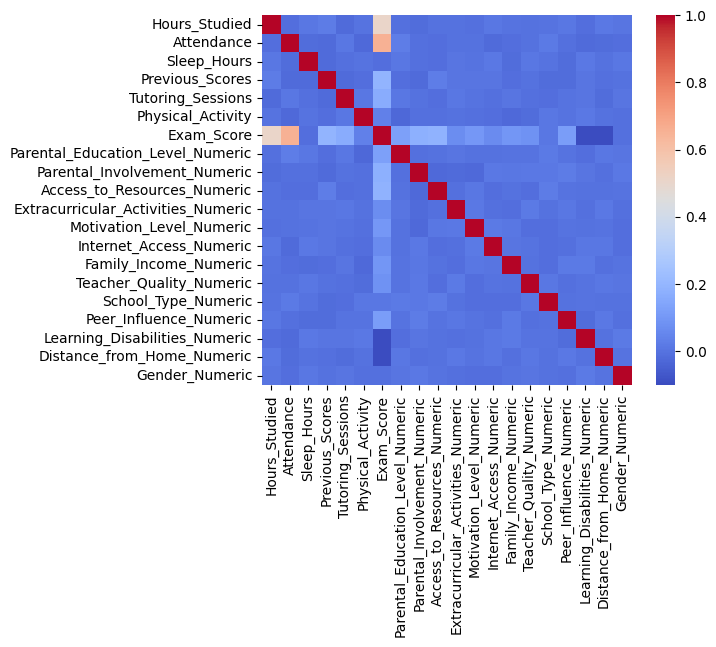

In [352]:
sns.heatmap(data_stand.corr(), square=True, cmap='coolwarm')
pass

Расстояния до дома и проблемы с обучаемостью линейно не связаны с успеваемостью 

In [353]:
data_stand.describe()

Hours_Studied    Attendance   Sleep_Hours  Previous_Scores  \
count   6.547000e+03  6.547000e+03  6.547000e+03     6.547000e+03   
mean   -1.302354e-16  5.724932e-16 -2.040355e-16    -1.324060e-16   
std     1.000000e+00  1.000000e+00  1.000000e+00     1.000000e+00   
min    -3.170707e+00 -1.728767e+00 -2.066078e+00    -1.739776e+00   
25%    -6.631833e-01 -8.624249e-01 -7.028518e-01    -8.363894e-01   
50%     5.489717e-03  3.916865e-03 -2.123860e-02    -2.494340e-03   
75%     6.741628e-01  8.702587e-01  6.603746e-01     8.314007e-01   
max     4.017528e+00  1.736600e+00  2.023601e+00     1.734787e+00   

       Tutoring_Sessions  Physical_Activity    Exam_Score  \
count       6.547000e+03       6.547000e+03  6.547000e+03   
mean       -6.511771e-18       2.604708e-17  2.003455e-15   
std         1.000000e+00       1.000000e+00  1.000000e+00   
min        -1.234705e+00      -2.881593e+00 -3.546281e+00   
25%        -3.972852e-01      -9.388694e-01 -6.124446e-01   
50%        -3.972852e-01       3.249248e-02 -2.567723e-02   
75%         4.401347e-01       1.003854e+00  5.610901e-01   
max         2.952395e+00       2.946578e+00  5.255229e+00   

       Parental_Education_Level_Numeric  Parental_Involvement_Numeric  \
count                      6.547000e+03                  6.547000e+03   
mean                       5.643535e-17                  1.031030e-16   
std                        1.000000e+00                  1.000000e+00   
min                       -8.949133e-01                 -1.563381e+00   
25%                       -8.949133e-01                 -1.235926e-01   
50%                       -8.949133e-01                 -1.235926e-01   
75%                        3.882662e-01                  1.316196e+00   
max                        1.671446e+00                  1.316196e+00   

       Access_to_Resources_Numeric  Extracurricular_Activities_Numeric  \
count                 6.547000e+03                        6.547000e+03   
mean                  7.190080e-17                        1.226384e-16   
std                   1.000000e+00                        1.000000e+00   
min                  -1.573325e+00                       -1.215657e+00   
25%                  -1.416976e-01                       -1.215657e+00   
50%                  -1.416976e-01                        8.224750e-01   
75%                   1.289929e+00                        8.224750e-01   
max                   1.289929e+00                        8.224750e-01   

       Motivation_Level_Numeric  Internet_Access_Numeric  \
count              6.547000e+03             6.547000e+03   
mean               1.117854e-16             6.891624e-17   
std                1.000000e+00             1.000000e+00   
min               -1.301742e+00            -3.504004e+00   
25%               -1.301742e+00             2.853442e-01   
50%                1.347159e-01             2.853442e-01   
75%                1.347159e-01             2.853442e-01   
max                1.571174e+00             2.853442e-01   

       Family_Income_Numeric  Teacher_Quality_Numeric  School_Type_Numeric  \
count           6.547000e+03             6.547000e+03         6.547000e+03   
mean            1.150413e-16            -2.626414e-16         3.907063e-17   
std             1.000000e+00             1.000000e+00         1.000000e+00   
min            -1.060867e+00            -2.002286e+00        -6.607754e-01   
25%            -1.060867e+00            -3.255187e-01        -6.607754e-01   
50%             2.867263e-01            -3.255187e-01        -6.607754e-01   
75%             2.867263e-01             1.351248e+00         1.513142e+00   
max             1.634319e+00             1.351248e+00         1.513142e+00   

       Peer_Influence_Numeric  Learning_Disabilities_Numeric  \
count            6.547000e+03                   6.547000e+03   
mean            -1.085295e-16                   4.558240e-17   
std              1.000000e+00                   1.000000e+00   
min       

In [354]:
data_stand.columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score',
       'Parental_Education_Level_Numeric', 'Parental_Involvement_Numeric',
       'Access_to_Resources_Numeric', 'Extracurricular_Activities_Numeric',
       'Motivation_Level_Numeric', 'Internet_Access_Numeric',
       'Family_Income_Numeric', 'Teacher_Quality_Numeric',
       'School_Type_Numeric', 'Peer_Influence_Numeric',
       'Learning_Disabilities_Numeric', 'Distance_from_Home_Numeric',
       'Gender_Numeric'],
      dtype='object')

In [391]:
X = data_stand.drop(['Exam_Score'], axis=1)
y = data['Exam_Score']

In [392]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(4910, 1637)

In [393]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [394]:
y_train_predict = lr_model.predict(X_train)
y_test_predict  = lr_model.predict(X_test)

In [395]:
lr_model.coef_

array([ 1.78205522e+00,  2.28829880e+00,  2.44008714e-02,  6.86843482e-01,
        5.93911613e-01,  2.12971078e-01,  3.97519466e-01,  6.83978977e-01,
        6.79293634e-01,  2.47875937e-01,  3.63089620e-01,  2.75422715e-01,
        3.66113021e-01,  3.08702298e-01, -1.62576259e-02,  3.73686011e-01,
       -2.71156636e-01, -3.22943784e-01,  9.88456111e-04])

In [396]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(0.7289218109677413,
 1.2739388932731035,
 0.9371765843167873,
 0.8906433864734566)

In [397]:
lr_model.score(X_train, y_train)

0.9371765843167873

In [398]:
lr_model.score(X_test, y_test)

0.8906433864734566

In [399]:
MSE_train = np.mean((y_train_predict - y_train)**2)
MSE_test  = np.mean((y_test_predict - y_test)**2)
MSE_train, MSE_test

(0.7289218109677413, 1.2739388932731035)

In [400]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(0.8537691789750561, 1.1286890153062994)

In [401]:
from sklearn import ensemble
rf_model = ensemble.RandomForestRegressor(n_estimators = 150)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

In [402]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)

In [403]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(0.8537691789750561, 1.1286890153062994)

In [405]:
importances = rf_model.feature_importances_
importances

array([0.27327209, 0.46219467, 0.01027216, 0.06393105, 0.02951855,
       0.01401153, 0.01216094, 0.03145815, 0.03203475, 0.00472426,
       0.00946299, 0.00277957, 0.01088331, 0.00715297, 0.0028437 ,
       0.01196996, 0.00690008, 0.01160726, 0.002822  ])

In [406]:
np.sum(importances)

1.0

In [407]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
importances

Attendance                            0.462195
Hours_Studied                         0.273272
Previous_Scores                       0.063931
Access_to_Resources_Numeric           0.032035
Parental_Involvement_Numeric          0.031458
Tutoring_Sessions                     0.029519
Physical_Activity                     0.014012
Parental_Education_Level_Numeric      0.012161
Peer_Influence_Numeric                0.011970
Distance_from_Home_Numeric            0.011607
Family_Income_Numeric                 0.010883
Sleep_Hours                           0.010272
Motivation_Level_Numeric              0.009463
Teacher_Quality_Numeric               0.007153
Learning_Disabilities_Numeric         0.006900
Extracurricular_Activities_Numeric    0.004724
School_Type_Numeric                   0.002844
Gender_Numeric                        0.002822
Internet_Access_Numeric               0.002780
dtype: float64

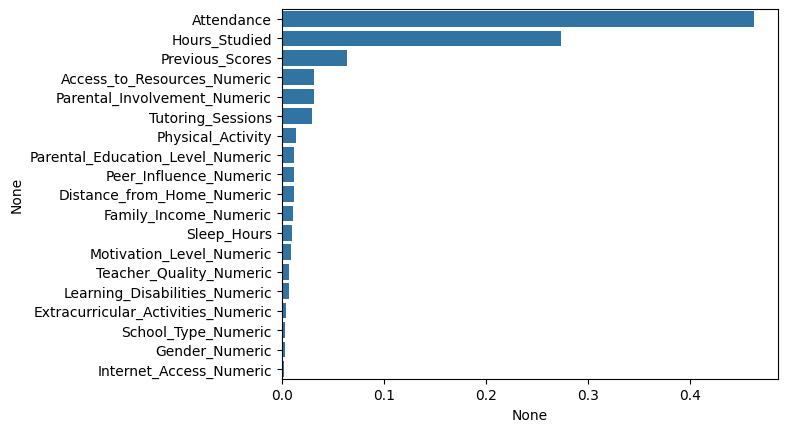

In [408]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

Уровень оценки на экзамене зависит от количества посещенных занятий и часов самостоятельной работы в первую очередь, потом от предыдущей оценки(скорее всего просто отличники учатся на пять, а троечники на три, а не отличникам ставят пятерки), также есть зависимость от доступность подачи материала, уровня образования одного из родителер(самого высокого) и дополнительных занятий с репетитором.

In [409]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score',
       'Parental_Education_Level_Numeric', 'Parental_Involvement_Numeric',
       'Access_to_Resources_Numeric', 'Extracurricular_Activities_Numeric',
       'Motivation_Level_Numeric', 'Internet_Access_Numeric',
       'Family_Income_Numeric', 'Teacher_Quality_Numeric',
       'School_Type_Numeric', 'Peer_Influence_Numeric',
       'Learning_Disabilities_Numeric', 'Distance_from_Home_Numeric',
       'Gender_Numeric'],
      dtype='object')

In [410]:
X = data_stand[['Hours_Studied', 'Attendance', 'Previous_Scores',
       'Tutoring_Sessions',
       'Parental_Education_Level_Numeric']]
y = data['Exam_Score']

In [411]:
X

Hours_Studied  Attendance  Previous_Scores  Tutoring_Sessions  \
0          0.506994    0.350454        -0.141477          -1.234705   
1         -0.161679   -1.382230        -1.114354           0.440135   
2          0.674163    1.563332         1.109366           0.440135   
3          1.510004    0.783624         1.595804          -0.397285   
4         -0.161679    1.043527        -0.697407           1.277555   
...             ...         ...              ...                ...   
6602       0.841331   -0.949059         0.066997          -0.397285   
6603       0.506994   -0.342620         0.414453           1.277555   
6604       0.005490    0.870259        -0.697407           1.277555   
6605      -1.666193    0.523722         1.109366           0.440135   
6606      -0.830352   -1.122327         1.317839          -1.234705   

      Parental_Education_Level_Numeric  
0                            -0.894913  
1                             0.388266  
2                             1.671446  
3                            -0.894913  
4                             0.388266  
...                                ...  
6602                         -0.894913  
6603                         -0.894913  
6604                          1.671446  
6605                         -0.894913  
6606                          1.671446  

[6547 rows x 5 columns]

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(4910, 1637)

In [413]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [414]:
y_train_predict = lr_model.predict(X_train)
y_test_predict  = lr_model.predict(X_test)

In [415]:
lr_model.coef_

array([1.74736363, 2.26815864, 0.67989496, 0.58944926, 0.39901522])

In [416]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(2.4417297123284243,
 3.1544350756368313,
 0.7895552055164821,
 0.7292190863451108)

In [417]:
lr_model.score(X_train, y_train)

0.7895552055164821

In [418]:
lr_model.score(X_test, y_test)

0.7292190863451108

In [419]:
MSE_train = np.mean((y_train_predict - y_train)**2)
MSE_test  = np.mean((y_test_predict - y_test)**2)
MSE_train, MSE_test

(2.4417297123284243, 3.1544350756368313)

In [420]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(1.5626035045168765, 1.7760729364631485)

In [421]:
rf_model = ensemble.RandomForestRegressor(n_estimators = 150)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

In [422]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)

In [423]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(1.5626035045168765, 1.7760729364631485)

In [424]:
importances = rf_model.feature_importances_
importances

array([0.30266234, 0.49609179, 0.11786908, 0.05431894, 0.02905784])

In [425]:
np.sum(importances)

1.0

In [426]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
importances

Attendance                          0.496092
Hours_Studied                       0.302662
Previous_Scores                     0.117869
Tutoring_Sessions                   0.054319
Parental_Education_Level_Numeric    0.029058
dtype: float64

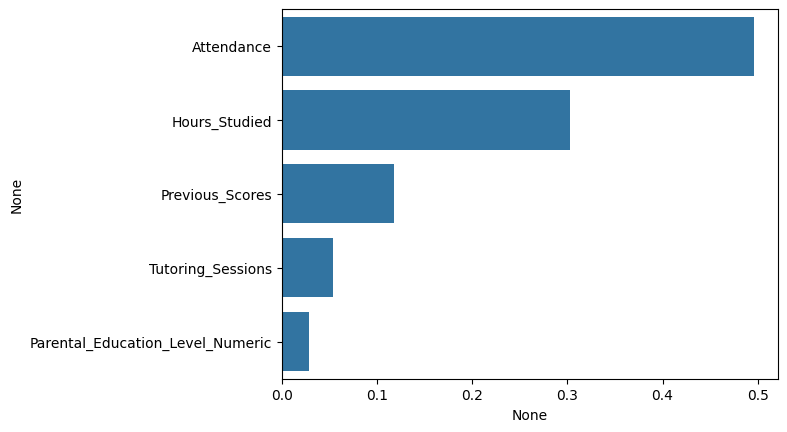

In [427]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

В первом случае, когда выборка делалась по всем параметрам методы линейной регрессии и случайного леса показали близкий результат по MSE, однако во втором случае, когда выборка делалась по первым 6 значимым параметрам, то случайный лес показал лучший результат.